In [1]:
from xgboost import XGBRegressor as XGBR
import pandas as pd
import numpy as np
from time import time
import matplotlib.pyplot as plt
import xgboost as xgb
#from sklearn.metrics import confusion_matrixs as cm,recall_score as recall,roc_auc_score as auc
from sklearn.model_selection import GridSearchCV
from xgboost.sklearn import XGBClassifier
import warnings
warnings.filterwarnings(module='sklearn*', action='ignore', category=DeprecationWarning)

In [2]:
df =pd.read_csv('Feature_Importance.csv',header = None)
df = df.drop(index = [0])
X = df.loc[:,1:56]
X = pd.DataFrame(data=X,dtype=np.float)
y = df.loc[:,57]
y = pd.DataFrame(data=y,dtype=np.int)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(
    X,y,test_size = 0.15,random_state = 9,stratify = y)

<ipython-input-2-1598b8623f4e>:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X = pd.DataFrame(data=X,dtype=np.float)
<ipython-input-2-1598b8623f4e>:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = pd.DataFrame(data=

[14:32:15] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


['Band_gap', 'c', 'B_O_bond', 'A_B_bond', 'A_O_bond', 'SH_B', 'EPA', 'X_A', 'energy', 'TC_A', 'mv_A', 'gamma', 'b', 'nsites', 'HOMO', 'IE_B', 'Z_B', 'a', 'Density', 'MP_A', 'alpha', 'rB', 'BP_B', 'FEPA', 'mv_B', 'CR_B', 'DP_B', 'rA', 'X_B', 'MP_B', 'air_A', 'FH_B', 'volume', 'mA', 'B_valence', 'TC_B', 'LUMO', 'FH_A', 'mB', 'air_B', 'CR_A', 'SH_A', 'beta', 'DP_A', 'B_density', 'A_density']


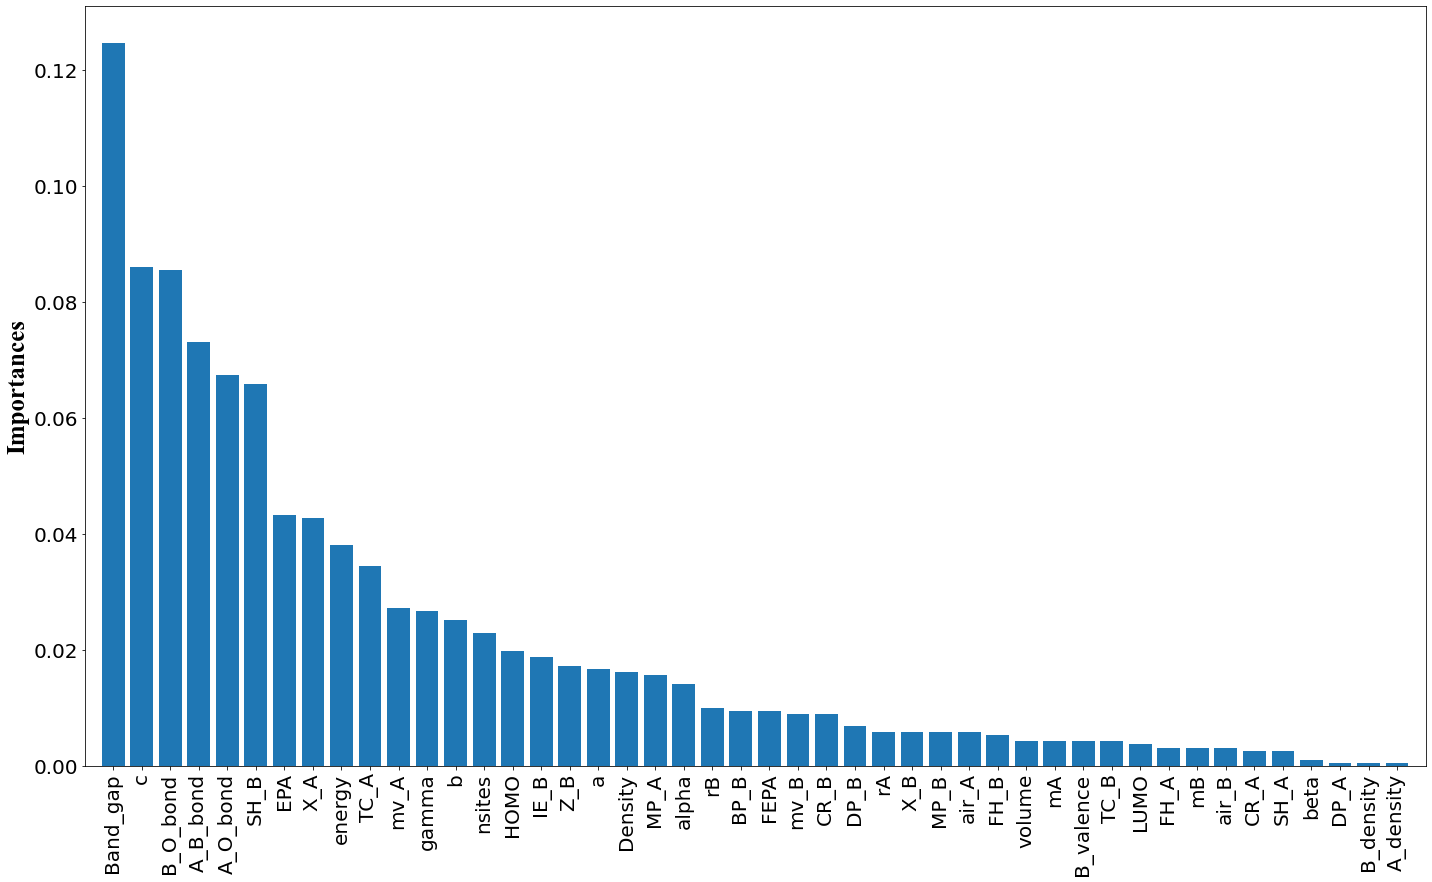

In [3]:
dtrain = xgb.DMatrix(X,y)

param = {'silent':False,'objective':'binary:logistic',"eta":0.02}
num_round = 500
M = xgb.train(param,dtrain,num_round)
importance = M.get_score(importance_type="weight")
d =pd.read_csv('Feature_Importance.csv')
feat_labels = d.columns[1:57]
df = pd.DataFrame.from_dict(importance,orient='index',columns=['score'])
df = df.reset_index().rename(columns = {'index':'id'})
df.sort_values('score',inplace = True)
df = df.iloc[::-1]
df1 = pd.DataFrame(feat_labels)
df1.columns = ['name']
fn = []
for i in df['id']:
    a = int(i) -1 
    fn.append(df1.loc[a,'name'])
#print(fn)
useless_feature = []
for i in feat_labels:
    if i not in fn:
        useless_feature.append(i)
print(fn)
df['feature_name'] = fn
columns = ['feature_name','score','id']    
df = pd.DataFrame(df,columns=columns)
sum_ = df['score'].sum()
df['feature_importance'] = df['score']/sum_
font1 = {'family':'Times New Roman',
         'weight':'bold',
         'size':25}
plt.figure(figsize=(20,12.36))
#for i in 
plt.bar(range(len(fn)),
        df['feature_importance'],
        align = 'center')
plt.xticks(range(len(fn)),
           fn,rotation=90)    
plt.xlim([-1,len(fn)])
plt.tick_params(labelsize = 20)
plt.ylabel('Importances',font1)
plt.tight_layout()
plt.show()